In [1]:
# Import OHLCV data and perform basic visualizations


In [2]:
import pandas as pd 
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

/home/venom/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# Download historical data for required stocks
tickers = ["MSFT","AMZN","AAPL","CSCO","IBM","FB"]

In [4]:
close_prices = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()

In [5]:
# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    close_prices[ticker] = yf.download(ticker,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
close_prices.head(10)

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2011-01-25,22.619738,176.699997,10.518178,16.108297,114.485573,NaN
2011-01-26,22.882114,175.389999,10.593659,16.018557,114.201920,NaN
2011-01-27,22.953665,184.449997,10.573944,16.033512,114.223190,NaN
2011-01-28,22.063190,171.139999,10.354892,15.652121,112.904167,NaN
2011-01-31,22.047285,169.639999,10.454096,15.816643,114.882721,NaN
2011-02-01,22.254007,172.110001,10.630016,16.055946,115.988998,NaN
2011-02-02,22.214251,173.529999,10.608141,16.168119,115.804634,NaN
2011-02-03,21.983683,173.710007,10.581032,16.384993,115.967697,NaN
2011-02-04,22.079086,175.929993,10.675306,16.489693,116.301033,NaN


In [7]:
# Handling NaN Values
close_prices.fillna(method='bfill',axis=0,inplace=True) # Replaces NaN values with the next valid value along the column
daily_return = close_prices.pct_change() # Creates dataframe with daily return for each stock
daily_return.head(10)

,MSFT,AMZN,AAPL,CSCO,IBM,FB
Date,,,,,,
2011-01-25,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-26,0.011599,-0.007414,0.007176,-0.005571,-0.002478,0.0
2011-01-27,0.003127,0.051656,-0.001861,0.000934,0.000186,0.0
2011-01-28,-0.038794,-0.072160,-0.020716,-0.023787,-0.011548,0.0
2011-01-31,-0.000721,-0.008765,0.009580,0.010511,0.017524,0.0
2011-02-01,0.009376,0.014560,0.016828,0.015130,0.009630,0.0
2011-02-02,-0.001786,0.008251,-0.002058,0.006986,-0.001589,0.0
2011-02-03,-0.010379,0.001037,-0.002556,0.013414,0.001408,0.0
2011-02-04,0.004340,0.012780,0.008910,0.006390,0.002874,0.0


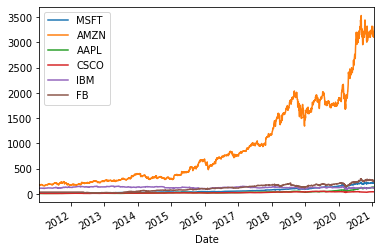

In [8]:
# Data vizualization
close_prices.plot() # Plot of all the stocks superimposed on the same chart

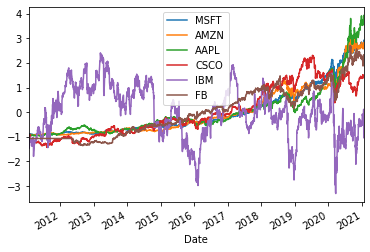

In [9]:
cp_standardized = (close_prices - close_prices.mean())/close_prices.std() # Standardization
cp_standardized.plot() # Plot of all the stocks standardized and superimposed on the same chart

/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/venom/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/venom/anaconda3/lib/python3.7/site-pac

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f155c4ac510>,
      dtype=object)

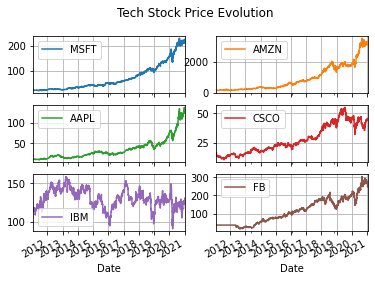

In [10]:
close_prices.plot(subplots=True, layout = (3,2), title = "Tech Stock Price Evolution", grid =True) # Subplots of the stocks

<BarContainer object of 6 artists>

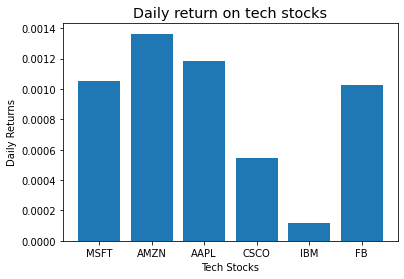

In [11]:
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on tech stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean())